In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from string import digits
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('Salaries.csv')

In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [6]:
df.isnull().sum

<bound method DataFrame.sum of       rank  discipline  yrs.since.phd  yrs.service    sex  salary
0    False       False          False        False  False   False
1    False       False          False        False  False   False
2    False       False          False        False  False   False
3    False       False          False        False  False   False
4    False       False          False        False  False   False
..     ...         ...            ...          ...    ...     ...
392  False       False          False        False  False   False
393  False       False          False        False  False   False
394  False       False          False        False  False   False
395  False       False          False        False  False   False
396  False       False          False        False  False   False

[397 rows x 6 columns]>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [8]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [9]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

<AxesSubplot:>

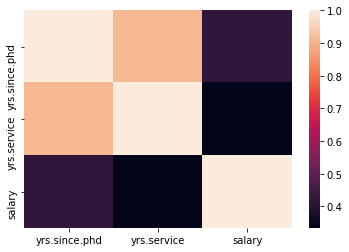

In [10]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='salary', ylabel='Density'>

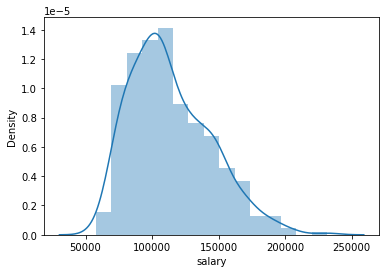

In [11]:
sns.distplot(df.salary)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

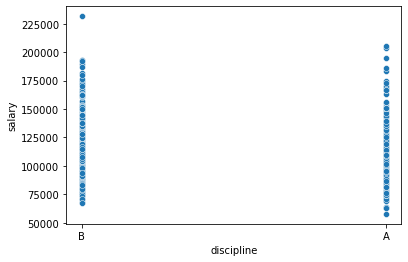

In [12]:
sns.scatterplot(x="discipline", y="salary",data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

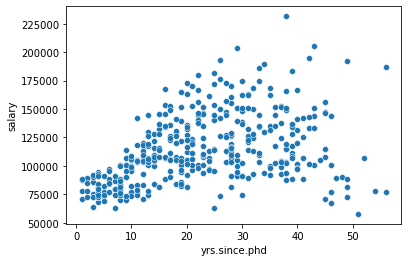

In [13]:
sns.scatterplot(x="yrs.since.phd",y="salary",data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

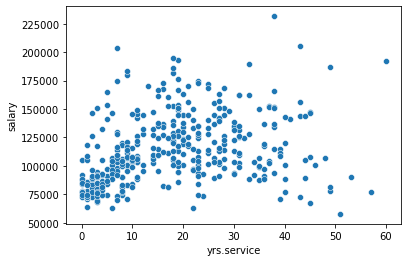

In [14]:
sns.scatterplot(x="yrs.service",y="salary",data=df)

In [15]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

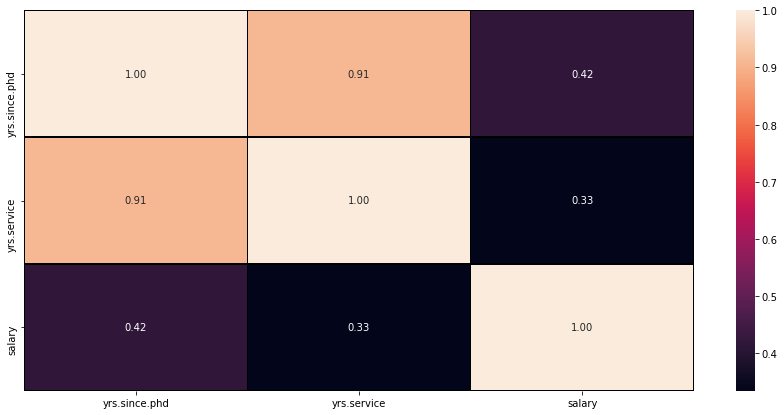

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor="black",fmt= '.2f')

Maxiumum correlation: years since phd is 47percent with salary
Minimum  correlation: years of service is 33 percent with salary

In [17]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


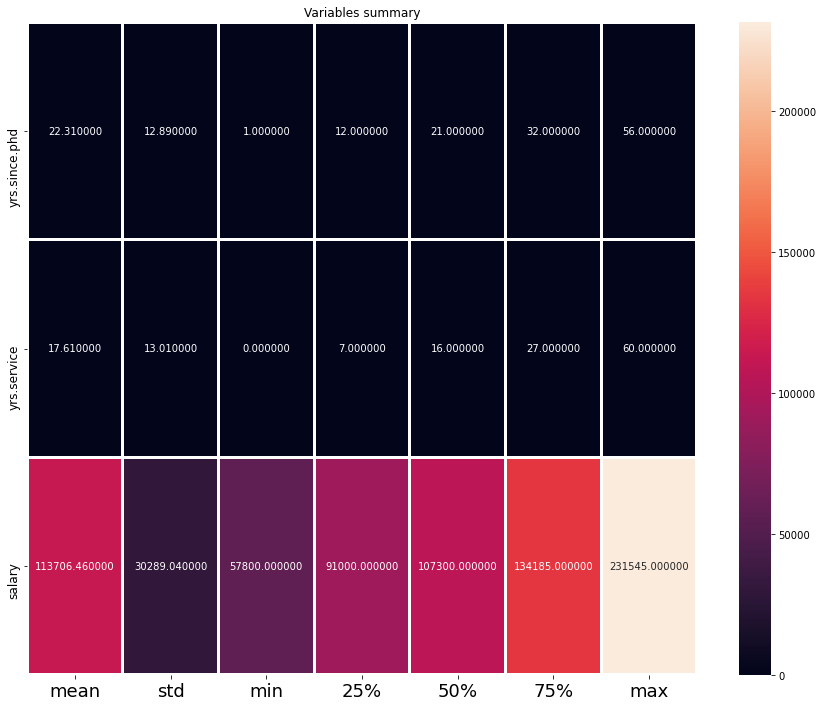

In [18]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

Text(0.5, 1.0, 'Rank wise salary')

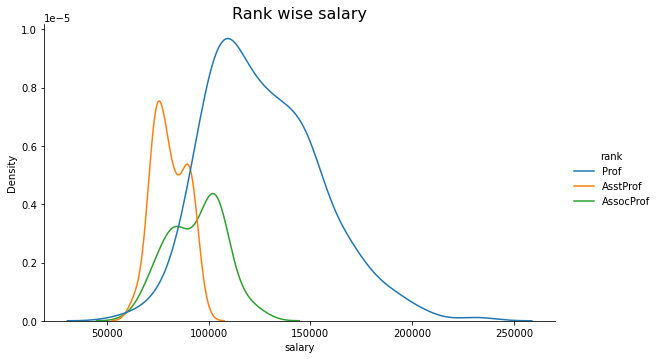

In [19]:
sns.displot(data=df, x='salary', hue='rank', kind='kde', aspect=1.6)
plt.title('Rank wise salary', fontsize=16)

Text(0.5, 1.0, 'Discipline wise salary')

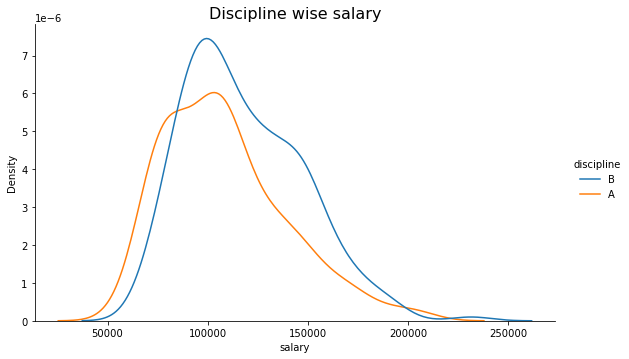

In [20]:

sns.displot(data=df, x='salary', hue='discipline', kind='kde', aspect=1.6)
plt.title('Discipline wise salary', fontsize=16)

Text(0.5, 1.0, 'Gender wise salary')

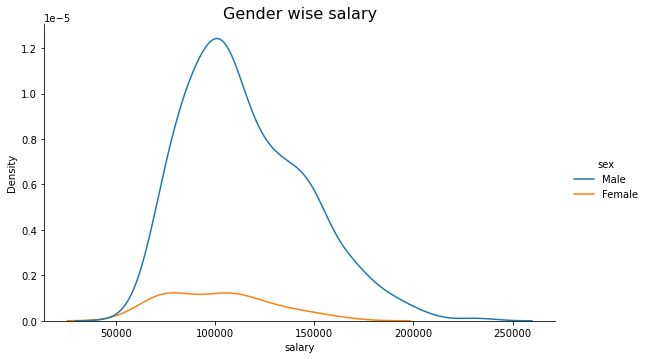

In [21]:

sns.displot(data=df, x='salary', hue='sex', kind='kde', aspect=1.6)
plt.title('Gender wise salary', fontsize=16)

outliers checking

Text(0.5, 1.0, 'Salary vs Years Since PHD Based on Rank')

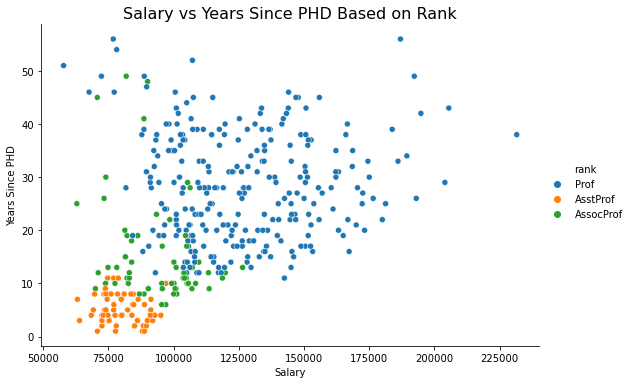

In [22]:
sns.relplot(data=df, x='salary', y='yrs.since.phd', hue='rank', height=5, aspect=1.5)
plt.xlabel('Salary')
plt.ylabel('Years Since PHD')
plt.title('Salary vs Years Since PHD Based on Rank', fontsize=16)

#rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary

# From this graph, we can conclude AsstProf salary is

Text(0.5, 1.0, 'Salary vs Years Of Service Based on Rank')

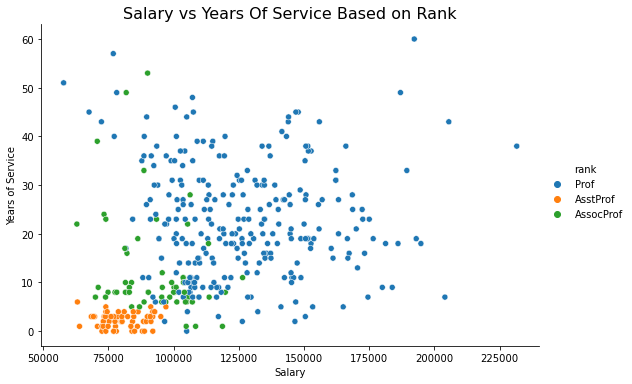

In [23]:
sns.relplot(data=df, x='salary', y='yrs.service', hue='rank', height=5, aspect=1.5)
plt.xlabel('Salary')
plt.ylabel('Years of Service')
plt.title('Salary vs Years Of Service Based on Rank', fontsize=16)

Text(0.5, 1.0, 'Salary vs Years Of Service Based on Rank')

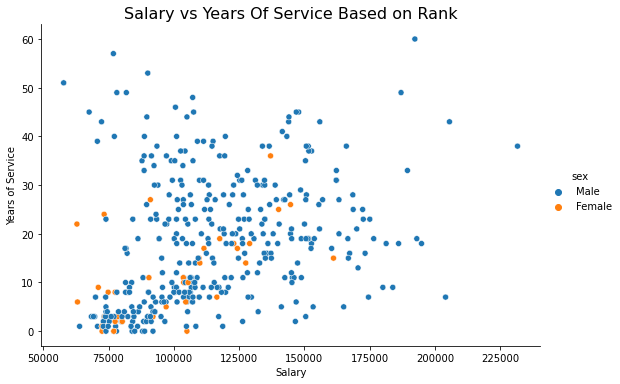

In [24]:
sns.relplot(data=df, x='salary', y='yrs.service', hue='sex', height=5, aspect=1.5)
plt.xlabel('Salary')
plt.ylabel('Years of Service')
plt.title('Salary vs Years Of Service Based on Rank', fontsize=16)

In [25]:
pd.get_dummies(df, columns=["rank"]).head()


,discipline,yrs.since.phd,yrs.service,sex,salary,rank_AssocProf,rank_AsstProf,rank_Prof
0,B,19,18,Male,139750,0,0,1
1,B,20,16,Male,173200,0,0,1
2,B,4,3,Male,79750,0,1,0
3,B,45,39,Male,115000,0,0,1
4,B,40,41,Male,141500,0,0,1


In [26]:
pd.get_dummies(df, columns=["discipline"]).head()

,rank,yrs.since.phd,yrs.service,sex,salary,discipline_A,discipline_B
0,Prof,19,18,Male,139750,0,1
1,Prof,20,16,Male,173200,0,1
2,AsstProf,4,3,Male,79750,0,1
3,Prof,45,39,Male,115000,0,1
4,Prof,40,41,Male,141500,0,1


In [27]:
pd.get_dummies(df, columns=["sex"]).head()
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


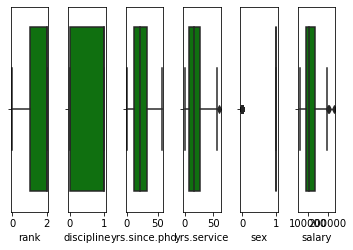

In [28]:
ncol=6
nrows=397

graph = 1
plt.figure(figsize=(5,10))
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
    plt.subplot(3,6,graph)
    sns.boxplot(df[column],color='green',orient='v')
    plt.xlabel(column,fontsize=10)
    graph+=1
    plt.tight_layout()
    

In [29]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Here salary has high skewness.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score

In [31]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,predtrain)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model performs well")
        print("At random_state:-",i)
        print("Training r2_score is:-",r2_score(y_train,predtrain)*100)
        print("Testing r2_score is:-",r2_score(y_test,pred_test)*100)

